In [5]:
from hestonpy.models.heston import Heston
from hestonpy.models.volatilitySmile import VolatilitySmile

import matplotlib.pyplot as plt 
import numpy as np

r = 0.00

# With syntetic market price

In [6]:
spot = 100
time_to_maturity = 1
true_params = {
    "vol_initial": 0.06,
    "kappa": 1.25,
    "theta": 0.06,
    "drift_emm": 0.00,
    "sigma": 0.6,
    "rho": -0.5,
}
vol = np.sqrt(0.04)

heston = Heston(spot=spot, r=r, **true_params)
price_function = heston.call_price

strikes = np.linspace(70, 140, 10) 

### Without noise

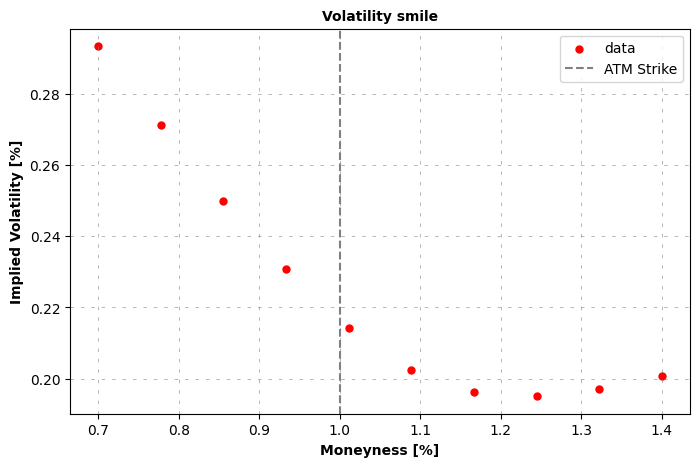

In [7]:
market_prices = price_function(**true_params, strike=strikes, time_to_maturity=time_to_maturity, s=spot)

volSmile = VolatilitySmile(
    strikes=strikes,
    time_to_maturity=time_to_maturity,
    atm=spot,
    market_prices=market_prices,
    r=r
)
volSmile.plot()

Local optimization (might not be global)

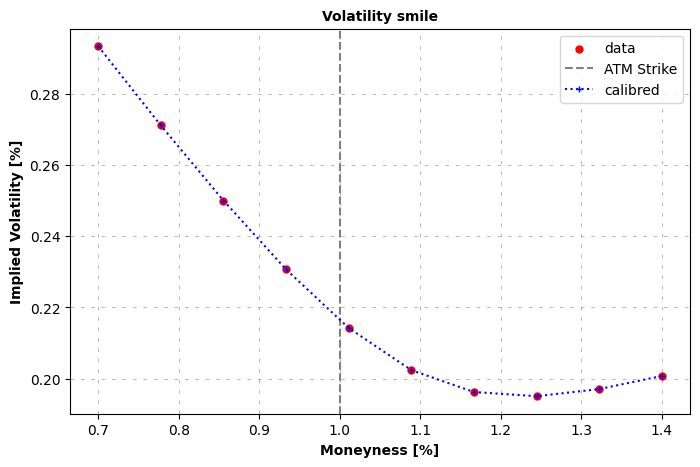

{'vol_initial': np.float64(0.04589513559224998),
 'kappa': np.float64(1.1953813349449975),
 'theta': np.float64(0.07837157810617176),
 'drift_emm': 0,
 'sigma': np.float64(0.48867992986685804),
 'rho': np.float64(-0.5946952696118957)}

In [8]:
calibrated_params = volSmile.calibration(
    price_function=price_function,
    guess_correlation_sign='negative',
    speed='local',
)
calibrated_heston = Heston(spot=spot, r=r, **calibrated_params)
volSmile.plot(calibrated_prices=heston.call_price(strike=strikes, time_to_maturity=time_to_maturity))
calibrated_params

In [9]:
true_params

{'vol_initial': 0.06,
 'kappa': 1.25,
 'theta': 0.06,
 'drift_emm': 0.0,
 'sigma': 0.6,
 'rho': -0.5}

Global optimization

at minimum 0.000012 accepted 1
Parameters: kappa=1.22212382540604 | theta=0.07960638071760312 | sigma=0.6310724869755606 | rho=-0.5039294600447907

at minimum 0.002986 accepted 1
Parameters: kappa=0.032413350076446905 | theta=0.8634177504639239 | sigma=0.39200390455951883 | rho=-0.5192597967648177

at minimum 0.000002 accepted 1
Parameters: kappa=1.1144183069310363 | theta=0.08158621665504481 | sigma=0.6077673225569638 | rho=-0.5050063430195851

at minimum 0.002986 accepted 1
Parameters: kappa=0.032413350076446905 | theta=0.8634177504639239 | sigma=0.39200390455951883 | rho=-0.5192597967648177

at minimum 0.002944 accepted 1
Parameters: kappa=0.037178533346680434 | theta=0.7600741268255687 | sigma=0.3928619247412016 | rho=-0.5191847171343348

at minimum 0.002852 accepted 1
Parameters: kappa=0.04795194336097734 | theta=0.6021886008620642 | sigma=0.39483673295220184 | rho=-0.5189992313184368

at minimum 0.000002 accepted 1
Parameters: kappa=1.1147061471306603 | theta=0.08158062176275406 

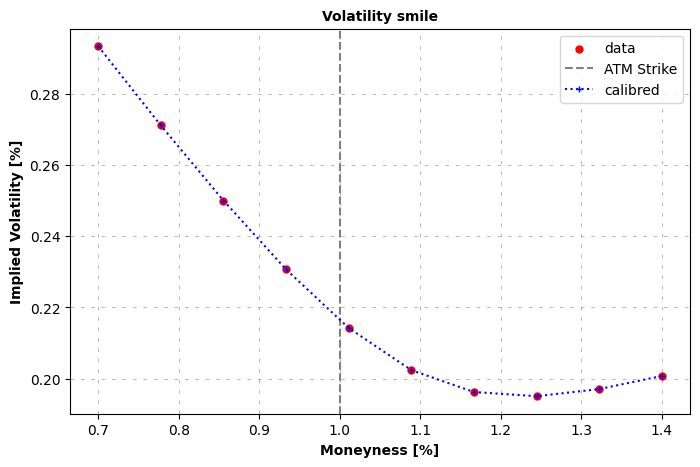

{'vol_initial': np.float64(0.04589513559224998),
 'kappa': np.float64(1.1144183069310363),
 'theta': np.float64(0.08158621665504481),
 'drift_emm': 0,
 'sigma': np.float64(0.6077673225569638),
 'rho': np.float64(-0.5050063430195851)}

In [10]:
calibrated_params = volSmile.calibration(
    price_function=price_function,
    guess_correlation_sign='negative',
    speed='global',
)
calibrated_heston = Heston(spot=spot, r=r, **calibrated_params)
volSmile.plot(calibrated_prices=heston.call_price(strike=strikes, time_to_maturity=time_to_maturity))
calibrated_params

In [11]:
true_params

{'vol_initial': 0.06,
 'kappa': 1.25,
 'theta': 0.06,
 'drift_emm': 0.0,
 'sigma': 0.6,
 'rho': -0.5}

with noise

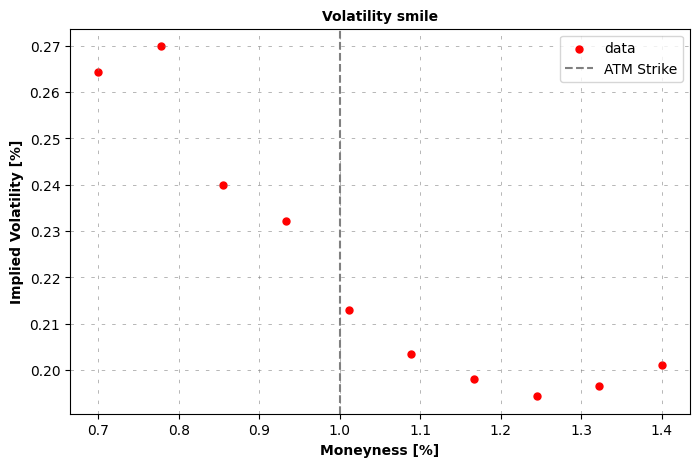

In [12]:
market_prices = market_prices * (1 + np.random.normal(scale=0.01, size=len(market_prices)))  # a little of market noise
volSmile = VolatilitySmile(
    strikes=strikes,
    time_to_maturity=time_to_maturity,
    atm=spot,
    market_prices=market_prices,
    r=r
)
volSmile.plot()

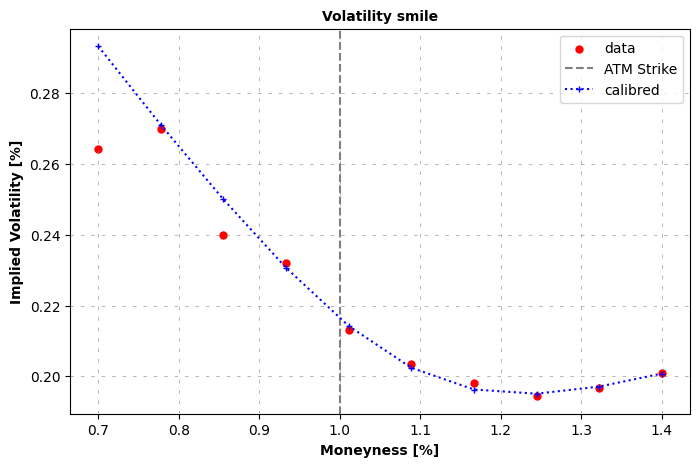

{'vol_initial': np.float64(0.04537815946224999),
 'kappa': np.float64(1.2223455866648465),
 'theta': np.float64(0.0686066412700041),
 'drift_emm': 0,
 'sigma': np.float64(0.3724863180441459),
 'rho': np.float64(-0.5869200781671311)}

In [13]:
calibrated_params = volSmile.calibration(
    price_function=price_function,
    guess_correlation_sign='negative',
    speed='local',
)
calibrated_heston = Heston(spot=spot, r=r, **calibrated_params)
volSmile.plot(calibrated_prices=heston.call_price(strike=strikes, time_to_maturity=time_to_maturity))
calibrated_params

at minimum 0.116701 accepted 1
Parameters: kappa=0.010094402685633948 | theta=2.0 | sigma=0.3066399187349955 | rho=-0.5082380814628497

at minimum 0.116704 accepted 1
Parameters: kappa=0.010414695831238559 | theta=1.940118680151774 | sigma=0.30668041382278366 | rho=-0.5082345664991846

at minimum 0.116715 accepted 1
Parameters: kappa=0.011442493068567941 | theta=1.7706121034051494 | sigma=0.30681244059797846 | rho=-0.508220992790009

at minimum 0.116739 accepted 1
Parameters: kappa=0.013648554062490732 | theta=1.492986605963167 | sigma=0.30709525557925615 | rho=-0.5081928925936193

at minimum 0.116714 accepted 1
Parameters: kappa=0.011313691440227262 | theta=1.7901662301212782 | sigma=0.30679588325082685 | rho=-0.5082226429828448

at minimum 0.116708 accepted 1
Parameters: kappa=0.010775414326437954 | theta=1.8769455871107021 | sigma=0.30672685275087386 | rho=-0.5082295720576061

['success condition satisfied'] True


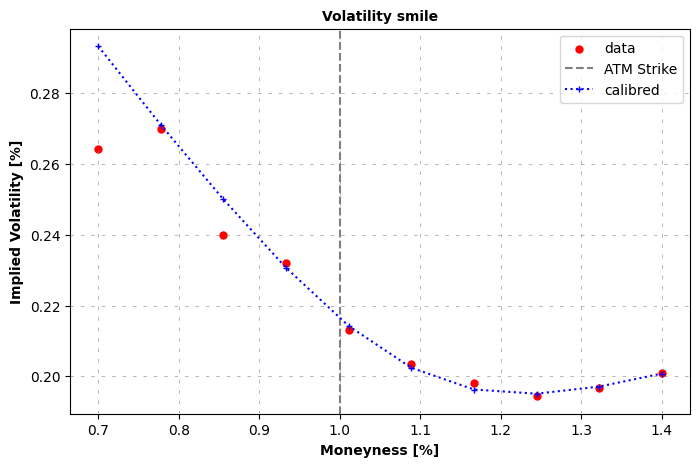

{'vol_initial': np.float64(0.04537815946224999),
 'kappa': np.float64(0.010414695831238559),
 'theta': np.float64(1.940118680151774),
 'drift_emm': 0,
 'sigma': np.float64(0.30668041382278366),
 'rho': np.float64(-0.5082345664991846)}

In [14]:
calibrated_params = volSmile.calibration(
    price_function=price_function,
    guess_correlation_sign='negative',
    speed='global',
)
calibrated_heston = Heston(spot=spot, r=r, **calibrated_params)
volSmile.plot(calibrated_prices=heston.call_price(strike=strikes, time_to_maturity=time_to_maturity))
calibrated_params

With SVI

['success condition satisfied'] True


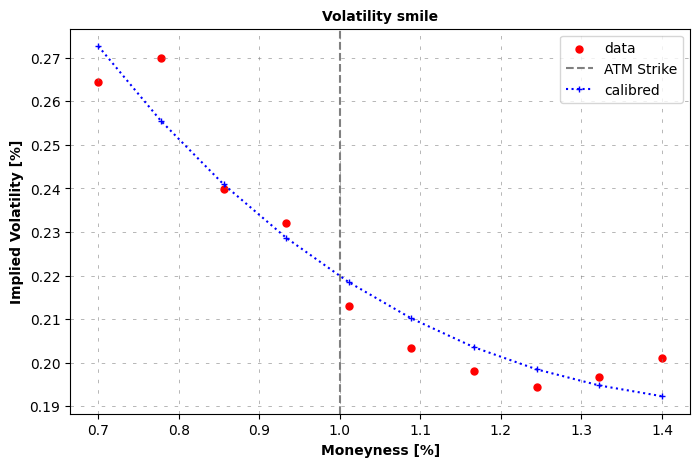

{'a': np.float64(-0.2751920471101697),
 'b': np.float64(0.1965231776976171),
 'rho': np.float64(-0.04699838867803144),
 'm': np.float64(0.3681254437891147),
 'sigma': np.float64(1.5867302057162238)}

In [15]:
calibrated_params, raw_svi_ivs = volSmile.svi_smooth(select_svi_ivs=False)
volSmile.plot(raw_svi_ivs)
calibrated_params